# **Market Basket Analysis**

>- <mark>**Market Basket Analysis (MBA)**</mark> is a used by businesses to understand the purchasing patterns of customers. It helps to identify the products that are frequently bought together in transactions.<br><br>
- MBA works by generating association rules like "If a customer buys bread, they are likely to also buy butter."







In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

>- `numpy` and `pandas` are used for data manipulation and numerical computations.
- `seaborn` and `matplotlib` are libraries for data visualization.

In [ ]:
df=pd.read_csv('/content/Groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


>- This cell reads the dataset from a CSV file using pandas and loads it into the variable data.
- The `data.head()` function shows the first 5 rows of the dataset to give a quick overview of the structure.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


>- `info()` is used to display a concise summary of the DataFrame (df). It provides important information about the structure of the dataset
- `info()` is typically used early in the analysis to understand the dataset's structure and identify issues such as missing data or incorrect data types.
- It also shows the memory usage of the DataFrame, which can be helpful for optimizing large datasets.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Member_number,0
Date,0
itemDescription,0


In [ ]:
df['date'] = pd.to_datetime(df['Date'], dayfirst=True)


>- `df.isnull()`: This function checks for missing (NaN) values in the DataFrame (df). It returns a new DataFrame of the same shape as df with True where the data is missing and False where it is not.
- `.sum()`: After identifying missing values, this function sums up the number of True values (i.e., the number of missing values) for each column. This gives you a count of how many missing values exist in each column.
- `.sort_values(ascending=False)`: This step sorts the resulting counts in descending order, so the columns with the most missing values appear at the top of the list.

In [ ]:
df.info

<bound method DataFrame.info of        Member_number        Date        itemDescription       date
0               1808  21-07-2015         tropical fruit 2015-07-21
1               2552  05-01-2015             whole milk 2015-01-05
2               2300  19-09-2015              pip fruit 2015-09-19
3               1187  12-12-2015       other vegetables 2015-12-12
4               3037  01-02-2015             whole milk 2015-02-01
...              ...         ...                    ...        ...
38760           4471  08-10-2014          sliced cheese 2014-10-08
38761           2022  23-02-2014                  candy 2014-02-23
38762           1097  16-04-2014               cake bar 2014-04-16
38763           1510  03-12-2014  fruit/vegetable juice 2014-12-03
38764           1521  26-12-2014               cat food 2014-12-26

[38765 rows x 4 columns]>

In [ ]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-01-05
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-02-01


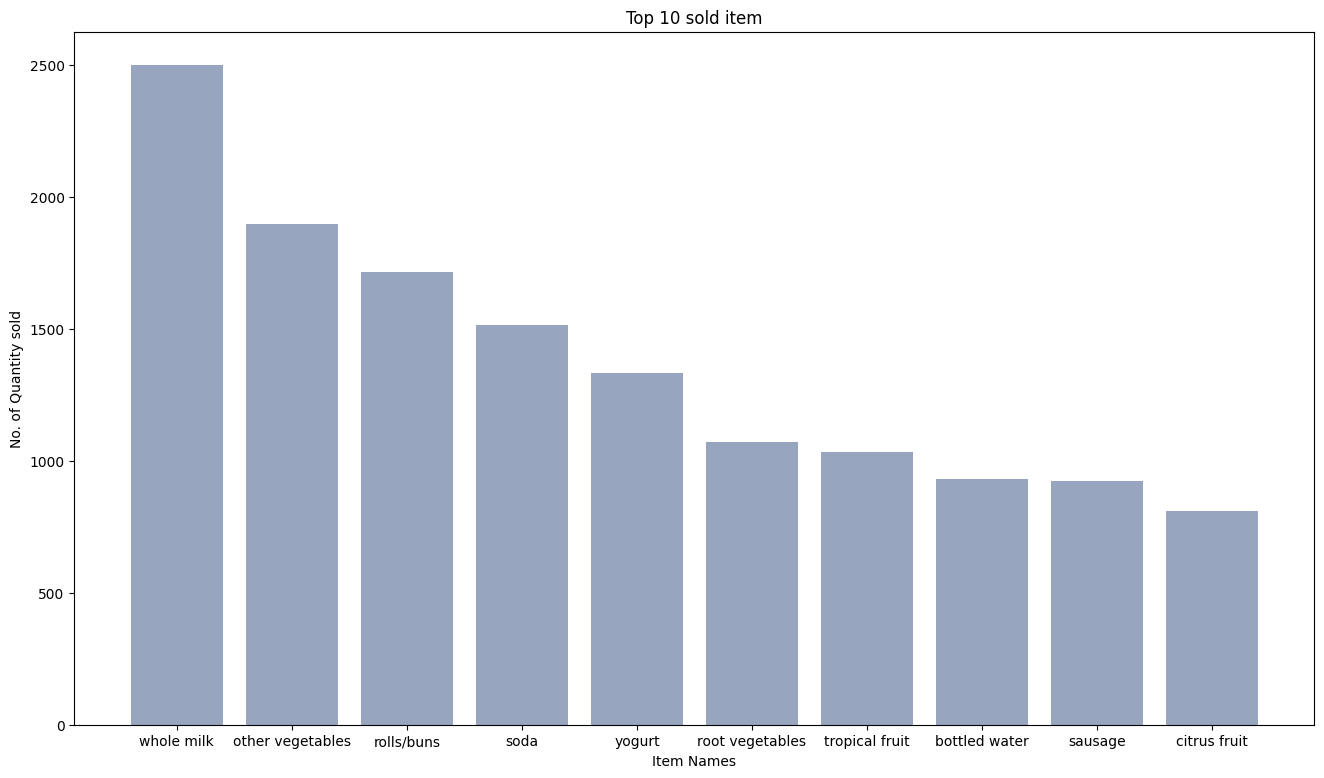

In [ ]:
Item_distr=df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)
bars=Item_distr['itemDescription']
height=Item_distr['Frequency']
x_pos=np.arange(len(bars))

plt.figure(figsize=(16,9))
plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))
plt.title("Top 10 sold item")
plt.xlabel('Item Names')
plt.ylabel('No. of Quantity sold')
plt.xticks(x_pos, bars)
plt.show()


#**<mark>Grouping and Sorting Items by Frequency</mark>**

>- `df.groupby(by='itemDescription')`: Groups the data by the itemDescription column (which represents different products).
- `.size()`: Counts the number of occurrences (sales) for each item.
- `.reset_index(name='Frequency')`: Resets the index and creates a new column called Frequency, which stores the count of how many times each item was sold.
- `.sort_values(by='Frequency', ascending=False)`: Sorts the items in descending order based on how many times they were sold, with the most sold items at the top.
- `.head(10)`: Selects the top 10 items with the highest sales.

#**<mark>Prepare Data for Plotting</mark>**

>- `bars`: Contains the names of the top 10 items that will be displayed on the x-axis of the bar chart.
- `height`: Contains the corresponding frequency (number of times each item was sold) that will determine the height of each bar.
- `x_pos`: Creates a sequence of positions (indices) corresponding to the number of items (top 10), used for the placement of the bars on the x-axis.

#**<mark>Plotting the Bar Chart</mark>**
>- `plt.figure(figsize=(16,9))`: Sets the figure size to 16 by 9 inches, which makes the plot large and easy to read.
- `plt.bar(x_pos, height, color=(0.2,0.3,0.5,0.5))`: Creates a bar chart with the item positions (x_pos) on the x-axis and their sales (height) on the y-axis. The color argument defines the color and transparency of the bars.
- `plt.title("Top 10 Sold Items")`: Sets the title of the bar chart to "Top 10 Sold Items".
- `plt.xlabel('Item Names')`: Labels the x-axis as "Item Names".
- `plt.ylabel('No. of Quantity Sold')`: Labels the y-axis as "No. of Quantity Sold".
- `plt.xticks(x_pos, bars)`: Assigns the item names (bars) as labels on the - - - `x-axis at the positions (x_pos)` corresponding to each bar.
- `plt.show()`: Displays the bar chart.



This plot visually highlights the 10 most frequently sold items, allowing you to quickly see which products are the most popular among customers.


In [ ]:
df_date= df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-01-05
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-02-01
...,...,...,...
08-10-2014,4471,sliced cheese,2014-10-08
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


>- `df.set_index(['Date'])`: This command sets the Date column as the index of the DataFrame (df), which means that each row will now be indexed by the date on which the data was recorded or transaction occurred.
- Having the Date as the index allows you to easily filter, sort, and analyze the data based on time, such as grouping by months, years, or performing rolling statistics.

<ipython-input-27-b01ac4fa7012>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_date['Date'] = pd.to_datetime(df_date['Date'])  # Convert 'Date' column to datetime


[Text(0.5, 0, 'date'), Text(0, 0.5, 'no of item sold')]

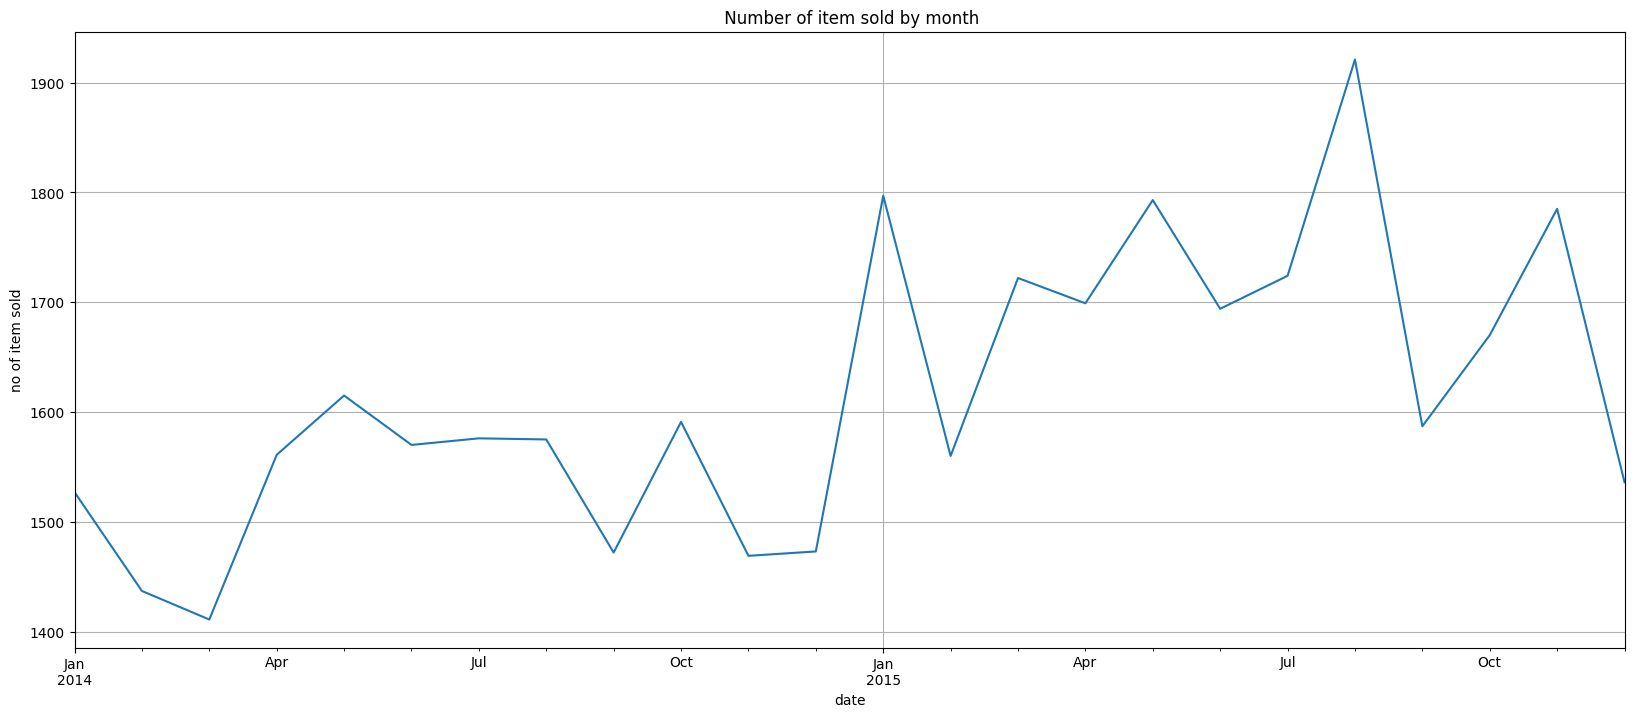

In [ ]:
df_date = df.copy()
df_date['Date'] = pd.to_datetime(df_date['Date'])
df_date = df_date.set_index(['Date'])

df_date.resample('M')['itemDescription'].count().plot(figsize=(20,8), grid=True, title= ' Number of item sold by month').set(xlabel='date', ylabel='no of item sold')

>-  `df.copy()`: This creates a copy of the original DataFrame (df) and assigns it to df_date. This is useful to avoid modifying the original DataFrame while performing operations that could change its structure.

>- `pd.to_datetime(df_date['Date'])`: This function converts the Date column to a datetime format. This step is essential because it ensures that the date data is in a format that allows for time-based operations, such as resampling and plotting.

>- `df_date.set_index(['Date'])`: This sets the Date column as the index of the DataFrame `(df_date)`. This action allows for easier time-series analysis, as all rows will now be indexed by their corresponding dates.

>- `df_date.resample('M')`: This command groups the data into monthly intervals. The `M` stands for month, meaning that it will aggregate the data for each month in the DataFrame.
- `['itemDescription'].count()`: This counts the number of entries (sales) for the `itemDescription` column in each month, giving the total number of items sold per month.
`.plot(figsize=(20,8))`: This creates a line plot with a figure size of 20 by 8 inches, making it large and easy to read.
- `grid=True`: This adds a grid to the plot for better visibility and readability of the data points.
- `title='Number of Items Sold by Month'`: This sets the title of the plot to `"Number of Items Sold by Month."`
- `.set(xlabel='Date', ylabel='No. of Items Sold')`: This function sets the labels for the x-axis and y-axis to `"Date"` and `"No. of Items Sold,"` respectively.

In [ ]:
cust_level=df[['Member_number','itemDescription']].sort_values(by='Member_number',ascending=False)
cust_level['itemDescription']=cust_level['itemDescription'].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


>- `df[['Member_number', 'itemDescription']]`: This selects only the `Member_number` and `itemDescription` columns from the original DataFrame (df). This new DataFrame (`cust_level`) will focus solely on these two pieces of information, which is important for analyzing customer purchase behavior.
- `.sort_values(by='Member_number', ascending=False)`: This sorts the new DataFrame in descending order based on the `Member_number` column. Sorting by `Member_number` is useful for identifying the highest or most active customers first.

>- `.str.strip()`: This method removes any leading or trailing whitespace from the itemDescription strings. This is important for ensuring that item names are clean and free from unnecessary spaces, which can cause issues in data analysis, such as duplicate entries.

In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))]

>- `cust_level.groupby(['Member_number'])`: This command groups the `cust_level` DataFrame by the `Member_number` column. Each group corresponds to a unique member, and all their associated item purchases are gathered together.
- `list(...)`: Converts the grouped object into a list of tuples. Each tuple contains a `Member_number` and the corresponding DataFrame for that member.
- `for a in ...`: This begins a loop that iterates over each tuple in the list. Here, a represents each tuple, where `a[0]` is the `Member_number` and `a[1]` is the DataFrame containing that member's purchases.
- `a[1]['itemDescription']`: This accesses the itemDescription column of the DataFrame corresponding to the current `Member_number`.
- `.tolist()`: Converts the `itemDescription` column into a standard Python list, containing all the item descriptions associated with that member.
- `transactions = [...]`: This list comprehension collects the lists of item descriptions for all members into a single list called `transactions`. Each element in this list corresponds to the purchases made by one member, resulting in a nested list structure.

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori
rules= apriori(transactions=transactions, min_support=0.002,min_confidence=0.05,min_lift=3,min_length=2)

>- The `Apriori` algorithm identifies frequent itemsets in transactional data and derives association rules from them.

>- `transactions=transactions`: This argument passes the previously created list of transactions (lists of items purchased by each customer) to the `Apriori` algorithm.
- `min_support=0.002`: Requires an itemset to appear in at least 0.2% of transactions to be considered frequent.
- `min_confidence=0.05`: Ensures that if an antecedent occurs, the consequent must also occur at least 5% of the time.
- `min_lift=3`: Indicates the consequent is three times more likely to occur with the antecedent than without it.
- `min_length=2`: Only considers itemsets that contain at least two items

In [ ]:
results=list(rules)

- `results = list(rules)`: This line converts the association rules generated by the Apriori algorithm into a standard Python list.

In [ ]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'domestic eggs', 'meat spreads'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [ ]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsinDataFrame = pd.DataFrame(inspect(results), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

resultsinDataFrame['Lift'] = pd.to_numeric(resultsinDataFrame['Lift'])

resultsinDataFrame.nlargest(n=10, columns='Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,bottled water,pip fruit,0.002052,0.105263,14.654135
4914,bottled water,pip fruit,0.002052,0.105263,12.068111
2674,beef,other vegetables,0.002052,0.242424,11.524021
3573,citrus fruit,yogurt,0.002052,0.073394,11.443670
4133,long life bakery product,meat,0.002052,0.148148,11.105413
3290,bottled water,sausage,0.002052,0.150943,10.322410
2904,bottled beer,misc. beverages,0.002309,0.097826,9.533152
5045,bottled water,other vegetables,0.002052,0.135593,9.438257
2902,bottled beer,domestic eggs,0.002052,0.086957,9.415459
2734,bottled water,shopping bags,0.002309,0.118421,9.232105


>- `def inspect(results)`:This line defines a function named inspect that will extract specific metrics from the results list containing the association rules.
- `lhs`: This list comprehension extracts the items in the antecedent (the left side of the rule) for each result.
- `rhs`: This list comprehension extracts the items in the consequent (the right side of the rule) for each result.

>- `supports`: Extracts the support value for each rule.
- `confidences`: Extracts the confidence value for each rule.
- `lifts`: Extracts the lift value for each rule.

>- The  `zip` function combines the extracted lists into tuples, where each tuple represents a rule with its `LHS`, `RHS`, `support`, `confidence`, and `lift`. This is returned as a list of tuples.

>- `resultsinDataFrame=[...]`: This line creates a pandas DataFrame named   `resultsinDataFrame` from the inspected results, with specified column names.

>- `resultsinDataFrame['Lift']=...` :This ensures that the Lift column is in numeric format, allowing for numerical operations and comparisons.

>- `nlargest(n=10, columns='Lift')`: This function retrieves the top 10 rules with the highest lift values, which indicates the strongest associations among items.
